In [101]:
import numpy as np
import math as m
import os
import cv2 as cv
from sklearn.cluster import KMeans

## This code was written for data analysis of an experiment on nucleation and growth of Te thin films, as part of the course
# Experimental Materials Science and Design at UC Berkeley. The objective is to process a sequence of frames and compute the 
# total area of the film that has been crystallized. 

# The code transforms a reference frame (user specified) into a numpy array and performs k-means clustering with the RGB values.
# The centroids are taken as the average value for each region (crystalline and amorphous) and the other frames are
# processed with these values as reference. This has to be repeated for each temperature, since the RGB centroids are radically
# different due to the film's rate-dependent optical properties. 


os.chdir('C:/Users/leoch_000/Desktop/MSE 130 Labs/30C 9nm Frames/') # Moves to the directory of the target temperature
print(os.getcwd())

C:\Users\leoch_000\Desktop\MSE 130 Labs\30C 9nm Frames


In [102]:
ref_im = cv.imread('Te35C101.43884892086395s.jpg') # Reads the reference frame as a numpy array. 

# We need to perform data selection (cut the right side of the figure) due to bad lighting
cut = m.floor((np.size(ref_im, 1)/2)) 
ref_im = ref_im[:, 0:cut, :]
orig_x = np.size(ref_im, 0)
orig_y = np.size(ref_im, 1)
print(orig_x, orig_y) # Prints the dimensions of the new figure

# Transforms the 3-d array into a 2-d array
ref_im = np.reshape(ref_im, (np.size(ref_im, 0)*np.size(ref_im, 1), 3))

# Performs k-means clustering
kmeans = KMeans(n_clusters=2).fit(ref_im)

print('Finished')

1536 1024
Finished


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]] 59911269.77083302 12.696853165273247 3.5632643973291187
[[ 18.11586087  43.30814824  89.14971191]
 [ 18.82141992  50.36834409 106.42255402]]


<function matplotlib.pyplot.show(*args, **kw)>

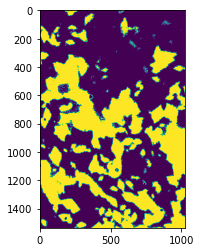

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt

#Extract the attributes
pred = kmeans.labels_
pred = pred.reshape(orig_x, orig_y)
stat_err = kmeans.inertia_
cl_centers = kmeans.cluster_centers_
print(pred, stat_err, stat_err/np.size(ref_im), m.sqrt(stat_err/np.size(ref_im)))
print(cl_centers)

#Plot the labels
plt.imshow(pred)
plt.show

In [97]:
uncertainties25 = np.array([145638826.7911498, 30.864890796057338, 5.555617949072572])
uncertainties30 = np.array([59911269.77083302 12.696853165273247 3.5632643973291187])
